In [3]:
import sys
sys.path.append('../')

from wigners_friend.config import (ANGLES, BETA, BACKEND, NOISE_MODEL, SHOTS)
from wigners_friend.stats import compute_inequalities
from wigners_friend.utils import generate_all_experiments

In [4]:
CHARLIE_SIZE = 3
DEBBIE_SIZE = 3

In [5]:
results = generate_all_experiments(backend=BACKEND, noise_model=NOISE_MODEL, shots=SHOTS, angles=ANGLES, beta=BETA, charlie_size=CHARLIE_SIZE, debbie_size=DEBBIE_SIZE)
print(compute_inequalities(results, verbose=True))

******Inequalities******
semi_brukner=0.3841000000000001 -- is violated: True
brukner=0.12300000000000022 -- is violated: True
lf=0.5897066666666664 -- is violated: True
I3322=0.3006533333333339 -- is_violated: True
bell_non_lf=0.5719199999999995 -- is_violated: True
**************************
{'lf': 0.5897066666666664, 'I3322': 0.3006533333333339, 'brukner': 0.12300000000000022, 'semi_brukner': 0.3841000000000001, 'bell_non_lf': 0.5719199999999995}


In [6]:
import numpy as np

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import pauli_error


def bitflip_model(p):
    # Example error probabilities
    p_meas = p
    p_gate1 = p

    # QuantumError objects
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    return noise_bit_flip

In [7]:
noise_bit_flip = bitflip_model(0.02)
size=1
results = generate_all_experiments(backend=BACKEND, noise_model=noise_bit_flip, shots=SHOTS, angles=ANGLES, beta=BETA, charlie_size=size, debbie_size=size)
compute_inequalities(results=results, verbose=True)

******Inequalities******
semi_brukner=-0.09698000000000007 -- is violated: False
brukner=-0.2825199999999999 -- is violated: False
lf=-0.5662666666666674 -- is violated: False
I3322=-0.481513333333333 -- is_violated: False
bell_non_lf=0.10812 -- is_violated: True
**************************


{'lf': -0.5662666666666674,
 'I3322': -0.481513333333333,
 'brukner': -0.2825199999999999,
 'semi_brukner': -0.09698000000000007,
 'bell_non_lf': 0.10812}

In [8]:
sizes = [1, 3, 5]
ps = np.linspace(0.0, 0.03, 10)
SHOTS = 10_000
all_results = []

for size in sizes:
    semi_brukner_results=[]
    for p in ps:
        noise_bit_flip = bitflip_model(p)
        results = generate_all_experiments(backend=BACKEND, noise_model=noise_bit_flip, shots=SHOTS, angles=ANGLES, beta=BETA, charlie_size=size, debbie_size=size)
        semi_brukner = compute_inequalities(results=results, verbose=False)['semi_brukner']
        semi_brukner_results.append(semi_brukner)
    all_results.append(semi_brukner_results)

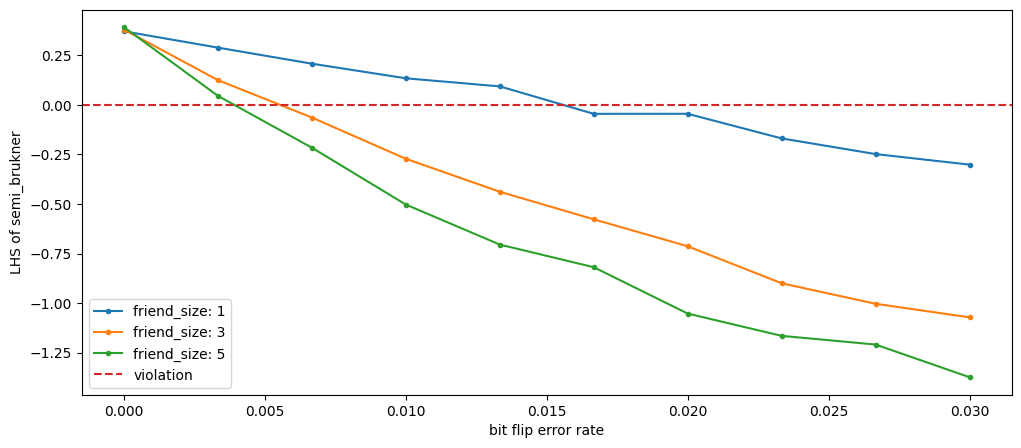

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
for i, res in enumerate(all_results):
    plt.plot(ps, res, '.-', label=f'friend_size: {sizes[i]}')

plt.axhline(y=0, color="tab:red", linestyle="--", label="violation")

plt.legend()
plt.xlabel('bit flip error rate')
plt.ylabel('LHS of semi_brukner')
plt.show()